     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],


'\n# fix for mpl bug that cuts off top/bottom of seaborn viz\nax = sns.heatmap(data, annot=True) #notation: "annot" not "annote"\nbottom, top = ax.get_ylim()\nax.set_ylim(bottom + 0.5, top - 0.5)\n'

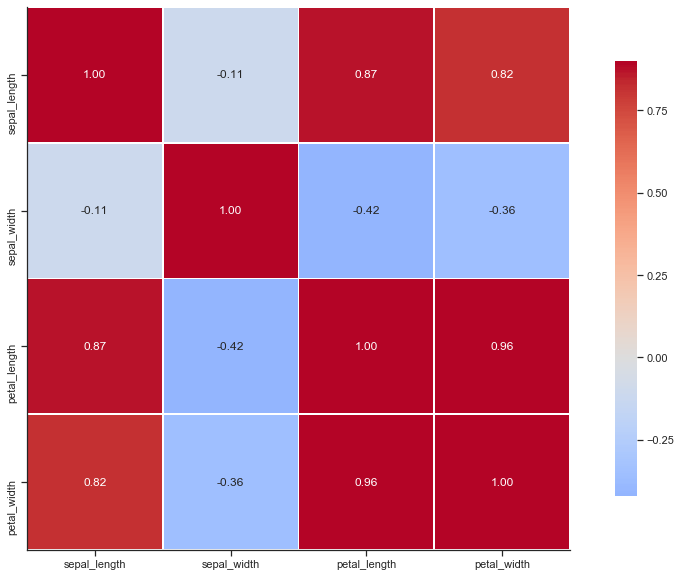

In [9]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from collections import Counter
import math
#%matplotlib inline
sns.set(style="ticks")




filepath = "C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW3_Submission/IRIS.csv"
data=pd.read_csv(filepath)
print(data)
print(data.columns)
print('Number valued columns:', data.select_dtypes(include=['int64']).columns)
num_cols= ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
print('Category valued columns:', data.select_dtypes(include=['object']).columns)
cat_cols=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


# Subset the columns

# Few rows of data
print(data.head(5))

#correlation plot
corr = data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
                square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

#plt.show()

'''
# fix for mpl bug that cuts off top/bottom of seaborn viz
ax = sns.heatmap(data, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
'''

#data = data.fillna(0)
#results = associations(data,nominal_columns=cat_cols,return_results=True)




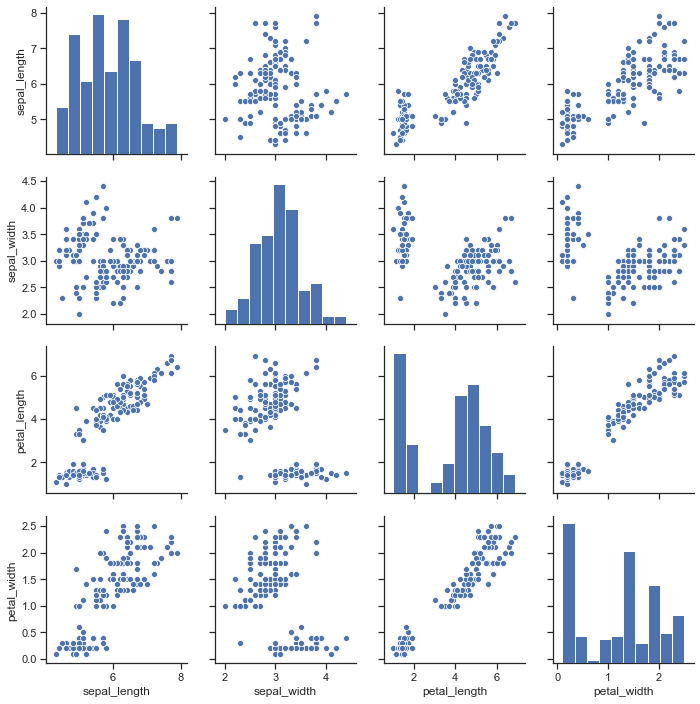

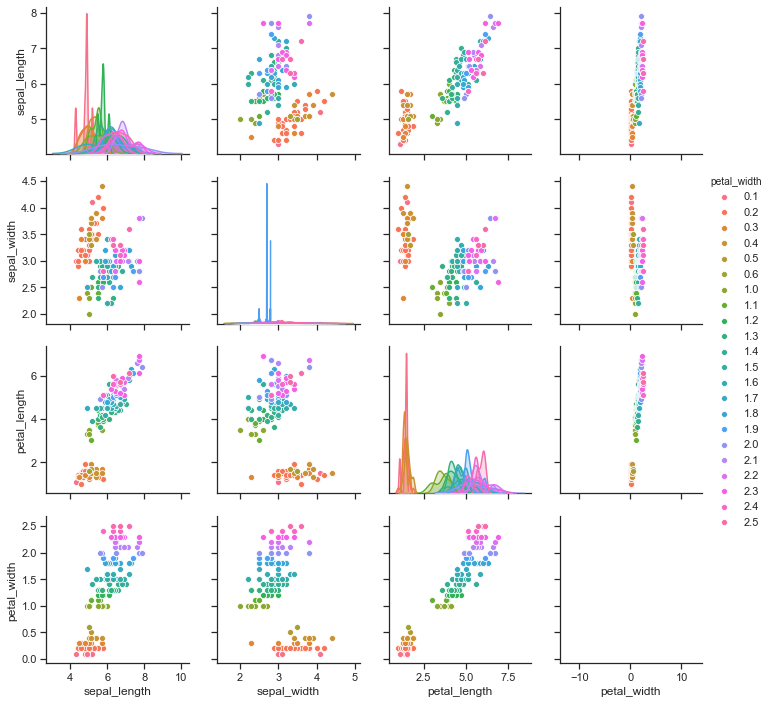

In [3]:
#pairplot
g = sns.pairplot(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']])
g = sns.pairplot(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']],hue = 'petal_width')
#plt.show()
 

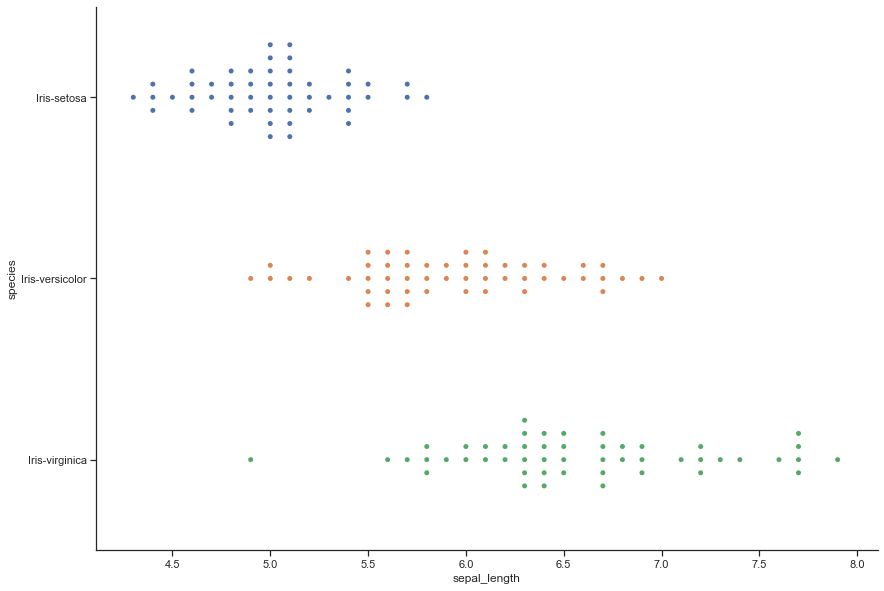

In [4]:
#swarm plt
g = sns.swarmplot(y ='species', x ='sepal_length', data = data)
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()


In [ ]:
#############################################################################################################

       age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   

'\n# fix for mpl bug that cuts off top/bottom of seaborn viz\nax = sns.heatmap(data, annot=True) #notation: "annot" not "annote"\nbottom, top = ax.get_ylim()\nax.set_ylim(bottom + 0.5, top - 0.5)\n'

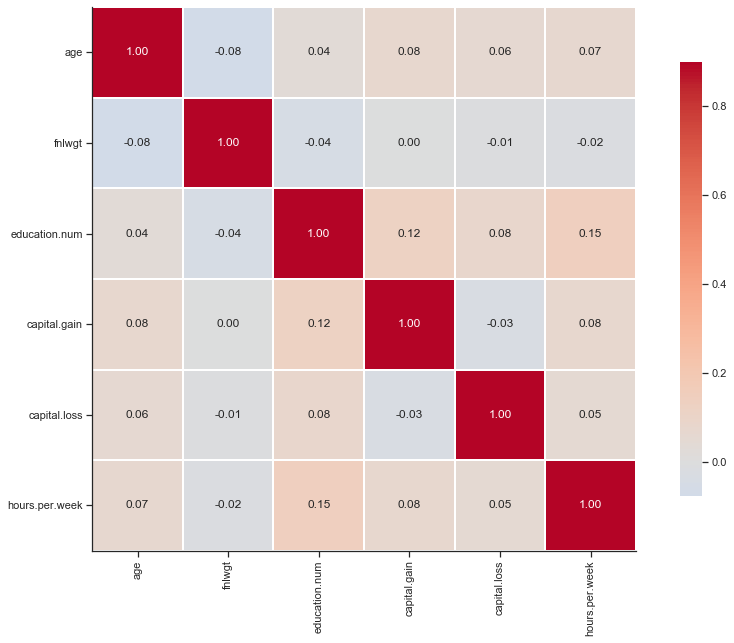

In [7]:
#adult_census_income 
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss
from collections import Counter
import math
#%matplotlib inline
sns.set(style="ticks")


def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data), to))
    else:
        return converted


def conditional_entropy(x, y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy


def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


def theils_u(x, y):
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n / total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories, measurements):
    fcat, i = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0, cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)
    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurements, y_total_avg), 2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator / denominator
    return eta


def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,return_results=False, **kwargs):

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0, len(columns)):
        for j in range(i, len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]], dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]], dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]], dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in
                          columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20, 20))  # kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot', True), fmt=kwargs.get('fmt', '.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr



filepath = "C:/Users/subar/Downloads/CMPE-255 Sec 99 - Data Mining/Home Works/HW3_Submission/adult_census_income.csv"
data=pd.read_csv(filepath)
print(data)
print(data.columns)
print('Number valued columns:', data.select_dtypes(include=['int64']).columns)
num_cols= ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']
print('Category valued columns:', data.select_dtypes(include=['object']).columns)
cat_cols=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


# Subset the columns
data = data[num_cols+ cat_cols]
# Few rows of data
print(data.head(5))

#correlation plot
corr = data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
                square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

#plt.show()

'''
# fix for mpl bug that cuts off top/bottom of seaborn viz
ax = sns.heatmap(data, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
'''

#player_df = data.fillna(0)
#results = associations(data,nominal_columns=cat_cols,return_results=True)



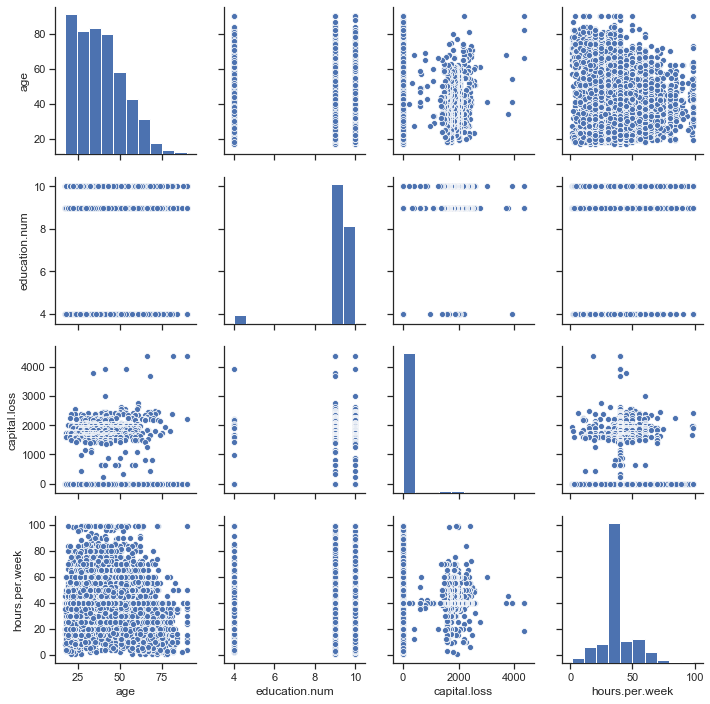

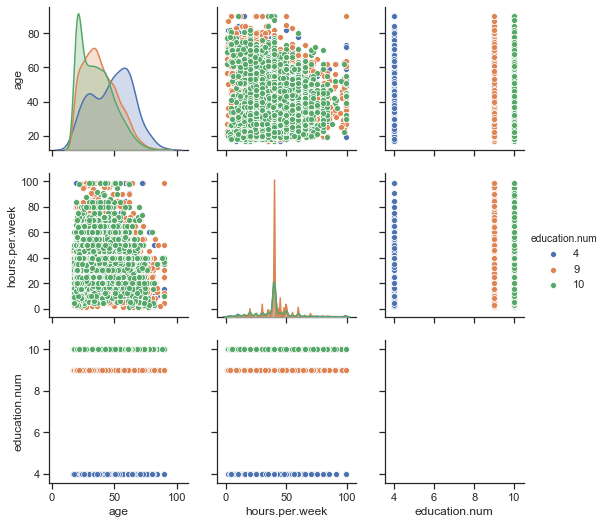

In [8]:
#pairplot
filtered_data = data[(data['education'].isin(['Some-college','HS-grad','7th-8th'])) &
                      (data['marital.status'].isin(['Widowed','Divorced','Separated','Never-married','Married-civ-spouse']))]
g = sns.pairplot(filtered_data[['age','education.num','marital.status','capital.loss','hours.per.week']])
g = sns.pairplot(filtered_data[['age','marital.status','income','hours.per.week','education.num']],hue = 'education.num')
#plt.show()



In [ ]:
#swarmplot
filtered_data = data[(data['education'].isin(['Some-college']))]
g = sns.swarmplot(y ='fnlwgt', x ='hours.per.week', data = filtered_data)
# remove the top and right line in graph
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()